    dealer_code  品番号  飲料カテゴリ      date  気温  売上  業種  INOUT
0             1   33       9  2017/1/1   5  10   3      1
1             1   33       9  2017/1/2   6  19   3      1
2             1   34       8  2017/1/1   5  18   3      1
3             1   34       8  2017/1/2   6  17   3      1
4             1   35       7  2017/1/1   5  16   3      1
5             1   35       7  2017/1/2   6  15   3      1
6             1   36       8  2017/1/1   5  17   3      1
7             1   36       8  2017/1/2   6  16   3      1
8             2   38       7  2017/1/1   5  33   4      2
9             2   38       7  2017/1/2   6   5   4      2
10            2   40       6  2017/1/1   5  44   4      2
11            2   40       6  2017/1/2   6  22   4      2
12            2   33       9  2017/1/1   5  34   4      2
13            2   33       9  2017/1/2   6  22   4      2
[0.007633587786259555, 0.5, 0.5194564546016058, 1.0]


C:\Users\murayama\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


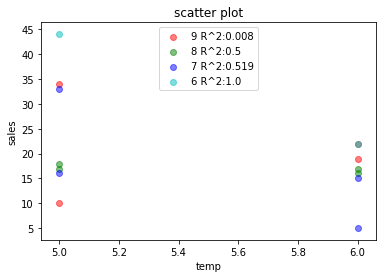

In [126]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
#data取得
all_data = pd.read_csv('all_data.csv', encoding = "shift-jis")
print(all_data)

#

#売上パターンに意味はあるか。分散を見よう。分散が低く安定して傾向のある部分を知りたい。
#売上パターン1:売上数TOP100
#売上パターン2:売上数最頻値
#売上パターン3:売上数低いところ


    #INOUT（2パターン）
        #業種カテゴリ(10パターン)ーー飲料カテゴリを含むバープロットに気温を重ねる
            #飲料カテゴリ(10パターン)ーー凡例飲料カテゴリの散布図


#気温パターン１:単純気温、10℃刻み5℃ずつずらす、←〇
#気温パターン２:前日+10℃以上変化した周り7日間の売上カテゴリの推移　平均のカテゴリ、分散も
#気温パターン３:






cate_list = all_data['飲料カテゴリ'].unique()
cate_data_x = []
cate_data_y = []
for name in cate_list:
    cate_data_x.append(all_data['気温'][all_data['飲料カテゴリ'] == name])
    cate_data_y.append(all_data['売上'][all_data['飲料カテゴリ'] == name])
    

#作図
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w"]
poly2_result = []
ax = fig.add_subplot(1,1,1)
for i in range(len(cate_list)):
    #カテゴリ別多項回帰
    X = pd.DataFrame({'X':cate_data_x[i].values,'X^2':np.square(cate_data_x[i].values)})
    Y = pd.DataFrame({'Y':cate_data_y[i].values})
    model = smf.OLS(Y,X)
    result = model.fit()
    #print(result.summary())
    poly2_result.append(result.rsquared)
    
    #作図
    a='aaa'+str(cate_list[i])
    ax.scatter(cate_data_x[i],cate_data_y[i],c = colorlist[i],alpha=0.5,label=str(cate_list[i])+' R^2:'+str(round(result.rsquared,3)))
    
    
print(poly2_result)
ax.legend(loc='upper center')
ax.set_title('scatter plot')
ax.set_xlabel("temp")
ax.set_ylabel("sales")

plt.savefig('figure.png')
    
 